# **Progetto di Digital Signal & Image Management**

## **Parte 1 - Audio recognition - DEMO**


*2020/2021*

Peracchi Marco 800578

Uccheddu Christian 800428

In [18]:
import numpy as np
import IPython.display as ipd
import librosa
import librosa.display
import sounddevice as sd

import matplotlib.pyplot as plt

import pickle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import mobilenet
from sklearn.linear_model import LogisticRegression

In [39]:
duration = 7 # (seconds)
rec_rate = 48000
signal = sd.rec(int(duration * rec_rate), samplerate=rec_rate, channels=1, blocking=True)

In [27]:
ipd.Audio(signal[:,0], rate=rec_rate)

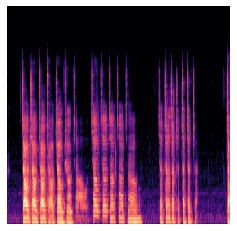

In [29]:
spect = librosa.feature.melspectrogram(y=signal[:,0], n_mels=128)
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)
S_dB = librosa.power_to_db(spect, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', ax=ax)
fig.savefig("single/test/"+"demo.png", dpi = 100)

In [30]:
single_processing = keras.preprocessing.image.ImageDataGenerator(preprocessing_function= mobilenet.preprocess_input)

single_generator = single_processing.flow_from_directory("single",
                                    target_size = (224, 224),
                                    color_mode = "rgb",
                                    batch_size = 1,
                                    class_mode = "categorical",
                                    shuffle = False,
                                    seed = 1)
test,label_test = next(single_generator)

Found 1 images belonging to 1 classes.


In [31]:
model_1 = tf.keras.models.load_model('modello_audio')
loaded_model = pickle.load(open("logistic_audio.sav", 'rb'))

In [ ]:
test_features = model_1.predict(test)
test_features = test_features.reshape(test_features.shape[0],
                                      test_features.shape[1]*test_features.shape[2]*test_features.shape[3])
pred_finali = loaded_model.predict(test_features)

In [38]:
labels = {"Improvvisato": 0, "Letto" : 1}
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in pred_finali]

predictions

['Improvvisato']